In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from Utils.DataLoader import DataLoader
from Utils.DataTransformer import DataTransformer
from Utils.DuckDb.DuckDb import DuckDb
from Utils.DatasetProcessor.DatasetProcessorUtils import DatasetProcessorUtils
from datetime import datetime
import pandas as pd
from typing import List
from Utils import PandasNotebookConfigs
import project_config
import numpy as np
import matplotlib.pyplot as plt


In [37]:
PandasNotebookConfigs.config()

Ajustando display.float.format para %.4f


In [38]:
DUCK_DB_UTILS = DuckDb()
DATA_TRANSFORMER = DataTransformer()
DATA_PROCESSOR_UTILS = DatasetProcessorUtils()

In [39]:
TABLE_NAME = project_config.PRE_PREPARED_DATA_TABLE

In [40]:
df = DUCK_DB_UTILS.load_table_to_predict(
    TABLE_NAME,
    start_from_safra=project_config.MAX_SAFRA_TO_CONSIDER_ON_DATA_PREPARE
)

In [41]:
df = DATA_PROCESSOR_UTILS.calc_remaining_days(df)

In [42]:
df.head()

,cost,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,num_25-1M,num_50-2M,num_50-1M,num_75-2M,num_75-1M,num_985-2M,num_985-1M,num_100-2M,num_100-1M,remaining_days
0,67.3556,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201611,128,71,50,101,470,488,148668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0000
1,80.6741,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201612,193,88,98,142,855,979,256812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0000
2,69.3364,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201701,135,69,78,147,438,696,157868,...,193.0000,71.0000,88.0000,50.0000,98.0000,101.0000,142.0000,470.0000,855.0000,31.0000
3,68.9275,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201702,116,61,58,114,468,642,156533,...,135.0000,88.0000,69.0000,98.0000,78.0000,142.0000,147.0000,855.0000,438.0000,28.0000
4,66.1132,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201611,59,23,11,21,520,545,133337,...,32.0000,28.0000,12.0000,18.0000,14.0000,19.0000,20.0000,665.0000,755.0000,50.0000


In [43]:
# Data to predict
df['safra'].value_counts()

safra
201611    227022
201612    211127
201701    205849
201702    173975
Name: count, dtype: int64

In [44]:
len(df)

817973

In [45]:
# Treating DF
df.isna().sum().T

cost                                       0
msno                                       0
safra                                      0
num_25                                     0
num_50                                     0
num_75                                     0
num_985                                    0
num_100                                    0
num_unq                                    0
total_secs                                 0
total_hours                                0
msno_1                                     0
payment_method_id                          0
payment_plan_days                          0
plan_list_price                            0
actual_amount_paid                         0
is_auto_renew                              0
is_cancel                                  0
safra_1                                    0
transaction_date_year                      0
transaction_date_month                     0
transaction_date_day                       0
transactio

In [ ]:
count = 0

def fill_out_historical_data(df: pd.DataFrame) -> pd.DataFrame:
    past_safras_to_consider = project_config.SAFRAS_TO_CONSIDER_ON_HISTORICAL_DATA

    # Key: past col
    # Value: "actual" col
    historical_cols = {}

    for col in project_config.COLUMNS_TO_GET_HISTORICAL_DATA:
        for s in past_safras_to_consider:
            historical_cols[f'{col}{s}M'] = col

    df_size = len(df)

    def __process(row: pd.Series):
        global count
        if count % 1500 == 0:
            print(f'-> {count} / {df_size}')

        count += 1

        edited = False
        for past_col, col in historical_cols.items():
            if pd.isna(row[past_col]):
                row[past_col] = int(row[col])
                edited = True

        row['_filled_out_past_info'] = edited

        return row

    df = df.apply(lambda row: __process(row), axis=1)

    return df

df = fill_out_historical_data(df)

-> 0 / 817973
-> 1500 / 817973
-> 3000 / 817973
-> 4500 / 817973
-> 6000 / 817973
-> 7500 / 817973
-> 9000 / 817973
-> 10500 / 817973
-> 12000 / 817973
-> 13500 / 817973
-> 15000 / 817973
-> 16500 / 817973
-> 18000 / 817973
-> 19500 / 817973
-> 21000 / 817973
-> 22500 / 817973
-> 24000 / 817973
-> 25500 / 817973
-> 27000 / 817973
-> 28500 / 817973
-> 30000 / 817973
-> 31500 / 817973
-> 33000 / 817973
-> 34500 / 817973
-> 36000 / 817973
-> 37500 / 817973
-> 39000 / 817973
-> 40500 / 817973
-> 42000 / 817973
-> 43500 / 817973
-> 45000 / 817973
-> 46500 / 817973
-> 48000 / 817973
-> 49500 / 817973
-> 51000 / 817973
-> 52500 / 817973
-> 54000 / 817973
-> 55500 / 817973
-> 57000 / 817973
-> 58500 / 817973
-> 60000 / 817973
-> 61500 / 817973
-> 63000 / 817973
-> 64500 / 817973
-> 66000 / 817973
-> 67500 / 817973
-> 69000 / 817973
-> 70500 / 817973
-> 72000 / 817973
-> 73500 / 817973
-> 75000 / 817973
-> 76500 / 817973
-> 78000 / 817973
-> 79500 / 817973
-> 81000 / 817973
-> 82500 / 817973
->

In [48]:
def print_cols_and_historical_cols(df: pd.DataFrame):
    cols = ['_filled_out_past_info']
    for col in project_config.COLUMNS_TO_GET_HISTORICAL_DATA:
        cols.append(col)

        for sfr in project_config.SAFRAS_TO_CONSIDER_ON_HISTORICAL_DATA:
            cols.append(f'{col}{sfr}M')

    return df[cols]

print_cols_and_historical_cols(df).head().T

,0,1,2,3,4
_filled_out_past_info,True,True,False,False,False
num_unq,488,979,696,642,545
num_unq-2M,488.0000,979.0000,488.0000,979.0000,707.0000
num_unq-1M,488.0000,979.0000,979.0000,696.0000,791.0000
total_secs,148668,256812,157868,156533,133337
total_secs-2M,148668.0000,256812.0000,148668.0000,256812.0000,173410.0000
total_secs-1M,148668.0000,256812.0000,256812.0000,157868.0000,190726.0000
num_25,128,193,135,116,59
num_25-2M,128.0000,193.0000,128.0000,193.0000,53.0000
num_25-1M,128.0000,193.0000,193.0000,135.0000,32.0000


In [49]:
# Treating DF
df.isna().sum().T

cost                                       0
msno                                       0
safra                                      0
num_25                                     0
num_50                                     0
num_75                                     0
num_985                                    0
num_100                                    0
num_unq                                    0
total_secs                                 0
total_hours                                0
msno_1                                     0
payment_method_id                          0
payment_plan_days                          0
plan_list_price                            0
actual_amount_paid                         0
is_auto_renew                              0
is_cancel                                  0
safra_1                                    0
transaction_date_year                      0
transaction_date_month                     0
transaction_date_day                       0
transactio

In [146]:
# Feature engineering
df['safra_year'] = df['safra'].astype(str).str[:4].astype(float)
df['safra_month'] = df['safra'].astype(str).str[-2:].astype(float)
df = df.drop('safra', axis=1)

In [147]:
df.head()

,cost,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,...,num_50-1M,num_75-2M,num_75-1M,num_985-2M,num_985-1M,num_100-2M,num_100-1M,remaining_days,safra_year,safra_month
0,51.8472,+Du/4jM+VTaOMRPmatC8DIwwSx8OkmxHTWNxnSHpcNw=,35,10,7,2,48,85,14137,3.9269,...,4.0000,1.0000,2.0000,2.0000,3.0000,27.0000,59.0000,30.0000,2016.0000,3.0000
1,71.1126,+KZYAFxInN7Z68gjphq61AuZdZzRyW7vmavZnd2JfSs=,13,10,13,13,722,536,183790,51.0528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0000,2016.0000,4.0000
2,64.5959,+P0y5ZZ8bY9+M3r1s+PayELAYHcwRjMt7q9sStzdUro=,70,18,13,8,447,436,123723,34.3675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0000,2016.0000,3.0000
3,56.8772,+Fis5VZf7Cd7oBAvS1arRnNJhO3qrUhUxyOqINT+WvY=,133,3,8,4,189,314,52758,14.6550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0000,2015.0000,7.0000
4,54.2344,+bvioUcz4Z31xL6R6n5miw8awB6CgiIrcQuA+UmgV04=,54,10,6,11,106,186,32858,9.1272,...,5.0000,9.0000,6.0000,6.0000,2.0000,118.0000,70.0000,30.0000,2016.0000,4.0000


In [148]:
df.isna().sum().T

cost                                      0
msno                                      0
num_25                                    0
num_50                                    0
num_75                                    0
num_985                                   0
num_100                                   0
num_unq                                   0
total_secs                                0
total_hours                               0
msno_1                                    0
payment_method_id                         0
payment_plan_days                         0
plan_list_price                           0
actual_amount_paid                        0
is_auto_renew                             0
is_cancel                                 0
safra_1                                   0
transaction_date_year                     0
transaction_date_month                    0
transaction_date_day                      0
transaction_date_day_of_week              0
transaction_date_day_of_year    

In [149]:
# Filtering
df = df[df['no_churn_information'] == False]

In [150]:
# Testing
df = df.drop(
    [
        # 'membership_expire_date_day_of_year',
        # 'transaction_date_day_of_year',
        # 'membership_expire_date_month',
        # 'transaction_date_day',
        # 'membership_expire_date_year',

        # 'transaction_date_year',
        # 'transaction_date_month',
        # 'transaction_date_day',
        # 'membership_expire_date_day',

        'transaction_date_year',
        'plan_list_price', 'actual_amount_paid', 'registration_init_time_month', 'membership_expire_date_day_of_week', 'registration_init_time_day_of_week', 'price_per_month', 'payment_plan_days', 'discount', 'is_active', 'no_churn_information', 'safra_year'
    ], axis=1
)

In [151]:
# Dropping duplicated columns or useless columns
drop_columns = [
    'msno', 'safra_1', 'safra_2', 'msno_1', 'msno_2', 'cost', '_filled_out_members_info',
    'members_msno', 'members_safra'
]

for col in drop_columns:
    if col not in df.columns:
        print(f'Coluna {col} não existente no DataFrame')
    else:
        print(f'Dropando coluna {col}')
        df = df.drop(col, axis=1,)


# drop_cat_columns = ['city', 'registered_via', 'payment_method_id']
# for df_cols in df.columns:
#     for cat_col in drop_cat_columns:
#         if cat_col in df_cols:
#             print(f'Dropando coluna {cat_col}')
#             df = df.drop(cat_col, axis=1,)

Dropando coluna msno
Dropando coluna safra_1
Coluna safra_2 não existente no DataFrame
Dropando coluna msno_1
Coluna msno_2 não existente no DataFrame
Dropando coluna cost
Dropando coluna _filled_out_members_info
Dropando coluna members_msno
Dropando coluna members_safra


In [152]:
# Removing null values (when removing one, remove all)
df = df.dropna(subset=['num_unq-2M'])

In [153]:
dict(df.isna().sum().T)

{'num_25': 0,
 'num_50': 0,
 'num_75': 0,
 'num_985': 0,
 'num_100': 0,
 'num_unq': 0,
 'total_secs': 0,
 'total_hours': 0,
 'payment_method_id': 0,
 'is_auto_renew': 0,
 'is_cancel': 0,
 'transaction_date_month': 0,
 'transaction_date_day': 0,
 'transaction_date_day_of_week': 0,
 'transaction_date_day_of_year': 0,
 'membership_expire_date_year': 0,
 'membership_expire_date_month': 0,
 'membership_expire_date_day': 0,
 'membership_expire_date_day_of_year': 0,
 'city': 0,
 'registered_via': 0,
 'registration_init_time_year': 0,
 'registration_init_time_day': 0,
 'registration_init_time_day_of_year': 0,
 'is_churn': 0,
 'num_unq-2M': 0,
 'num_unq-1M': 0,
 'total_secs-2M': 0,
 'total_secs-1M': 0,
 'num_25-2M': 0,
 'num_25-1M': 0,
 'num_50-2M': 0,
 'num_50-1M': 0,
 'num_75-2M': 0,
 'num_75-1M': 0,
 'num_985-2M': 0,
 'num_985-1M': 0,
 'num_100-2M': 0,
 'num_100-1M': 0,
 'remaining_days': 0,
 'safra_month': 0}

In [154]:
# Turning columns into categories
cat_columns = {
    'payment_method_id': DATA_PROCESSOR_UTILS.get_total_payment_method_id_count() + 1,
    'city': DATA_PROCESSOR_UTILS.get_total_city_count() + 1,
    'registered_via': DATA_PROCESSOR_UTILS.get_total_registered_via_count() + 1
}

In [155]:
cat_columns

{'payment_method_id': 42, 'city': 23, 'registered_via': 20}

In [156]:
df = DATA_TRANSFORMER.convert_to_category(
    df,
    list(cat_columns.keys())
)

df = pd.get_dummies(df, columns=list(cat_columns.keys()))

In [157]:
# Test: filling out the missing categories
for cat, total_count in cat_columns.items():
    for i in range(total_count):
        cat_key = f'{cat}_{int(i)}'

        # Fixing wrong values, like "city_1.0" -> "city_1"

        wrong_cat_key = f'{cat_key}.0'
        if wrong_cat_key in list(df.columns):
            print(f'Ajustando categoria de nome "{wrong_cat_key}" para "{cat_key}"')
            df = df.rename(columns={wrong_cat_key: cat_key})

        # print(f'Procurando {cat_key}...')

        if cat_key not in list(df.columns):
            print(f'Adicionando coluna {cat_key}')
            df[cat_key] = False

Adicionando coluna payment_method_id_0
Adicionando coluna payment_method_id_1
Adicionando coluna payment_method_id_2
Adicionando coluna payment_method_id_3
Adicionando coluna payment_method_id_4
Adicionando coluna payment_method_id_5
Adicionando coluna payment_method_id_6
Adicionando coluna payment_method_id_7
Adicionando coluna payment_method_id_9
Adicionando coluna city_0
Adicionando coluna city_2
Adicionando coluna city_19
Adicionando coluna registered_via_0
Adicionando coluna registered_via_1
Adicionando coluna registered_via_2
Adicionando coluna registered_via_5
Adicionando coluna registered_via_6
Adicionando coluna registered_via_8
Adicionando coluna registered_via_10
Adicionando coluna registered_via_11
Adicionando coluna registered_via_12
Adicionando coluna registered_via_14
Adicionando coluna registered_via_15
Adicionando coluna registered_via_16
Adicionando coluna registered_via_17
Adicionando coluna registered_via_18
Adicionando coluna registered_via_19


In [158]:
df.head()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,is_auto_renew,is_cancel,...,registered_via_8,registered_via_10,registered_via_11,registered_via_12,registered_via_14,registered_via_15,registered_via_16,registered_via_17,registered_via_18,registered_via_19
0,35,10,7,2,48,85,14137,3.9269,True,False,...,False,False,False,False,False,False,False,False,False,False
4,54,10,6,11,106,186,32858,9.1272,True,False,...,False,False,False,False,False,False,False,False,False,False
5,32,3,12,14,317,370,81447,22.6242,True,False,...,False,False,False,False,False,False,False,False,False,False
7,33,7,11,8,1033,848,260804,72.4456,True,False,...,False,False,False,False,False,False,False,False,False,False
8,82,25,7,39,178,227,60697,16.8603,True,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
target_cols = 'is_churn'

# Balancing
print(f'Tamanho do DataFrame PRÉ balanceamento: {len(df)}')

true_df = df[df['is_churn'] == True]
false_df = df[df['is_churn'] == False]

false_df = false_df[:int(len(true_df) // 1.52)]

new_df = pd.concat([true_df, false_df])

print(f'Tamanho do DataFrame PÓS balanceamento: {len(new_df)}')

X = new_df.drop(target_cols, axis=1)
y = new_df[target_cols]

# X = df.drop(target_cols, axis=1)
# y = df[target_cols

Tamanho do DataFrame PRÉ balanceamento: 119902
Tamanho do DataFrame PÓS balanceamento: 26020


In [160]:
len(X), len(y)

(26020, 26020)

In [161]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train_cost = X_train['cost+1M']
# X_train = X_train.drop('cost+1M', axis=1)

# X_test_cost = X_test['cost+1M']
# X_test = X_test.drop('cost+1M', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
len(X_train), len(X_test), len(y_train), len(y_test)

(20816, 5204, 20816, 5204)

In [163]:
# Create evaluation function (the competition uses RMLSE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
import numpy as np


def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared error between predictions and true labels
    '''
    return str(np.sqrt(mean_squared_log_error(y_test, y_preds)))


def show_scores(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)

    # When val_preds score is bigger, it means that your model has overfitting problems
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Valid MAE': mean_absolute_error(y_test, val_preds),

        # 'Training RMSLE': rmsle(y_train, train_preds),
        # 'Valid RMSLE': rmsle(y_test, val_preds),

        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, val_preds),
    }

    return scores


def show_scores_2(y_true, y_preds):
    # When val_preds score is bigger, it means that your model has overfitting problems
    scores = {
        'MAE': mean_absolute_error(y_true, y_preds),
        'MSE': mean_squared_error(y_true, y_preds),
        'R^2': r2_score(y_true, y_preds),
    }

    return scores

In [164]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
sm = SMOTE(random_state=42, n_jobs=-1)
X_res, y_res = sm.fit_resample(X_train, y_train)

/home/caio/Git-Projetos/2025-case-data-master-caio-arrabal/env/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/caio/Git-Projetos/2025-case-data-master-caio-arrabal/env/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [165]:
len(X_res), len(X_test), len(y_res), len(y_test)

(25086, 5204, 25086, 5204)

In [166]:
# Put models on a dictionary
models = {
    # 'Logistic Regression': LogisticRegression(random_state=42),
    # 'KNN': KNeighborsClassifier(),

    'Random Forest': RandomForestClassifier(
        random_state=42,
        bootstrap=False,
        max_depth=30,
        max_features='log2',
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=100
    ),
    # {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
    # 'Gradient Boost': GradientBoostingClassifier(random_state=42),

    # 'SVC': SVC(random_state=42),
    # 'MLP': MLPClassifier(random_state=42),

    # 'XGBClassifier': XGBClassifier(random_state=42),
    # 'LGBMClassifier': LGBMClassifier(random_state=42),
    # 'CatBoostClassifier': CatBoostClassifier(random_state=42),
}



# Exemplo de inicialização de alguns classificadores
# xgb = XGBClassifier()
# lgbm = LGBMClassifier()
# catboost = CatBoostClassifier()

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learning machine learning models
    X_train: training data, no labels
    X_test: testing data, no labels 
    y_train: training labels
    y_test: test labels
    '''
    np.random.seed(42)

    models_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        print(f'{datetime.now()} Treinando {name}...')
        model.fit(X_train, y_train)
        # model.fit(X_res, y_res)

        # # Evaluate the model and append its score to model_scores
        # models_scores[name] = model.score(X_test, y_test)

        print(f'{datetime.now()} Predict {name}...')
        y_preds = model.predict(X_test)

        # score = recall_score(y_test, y_preds)
        score_f1 = f1_score(y_test, y_preds)
        print(f'{datetime.now()} Score (f1_score): {score_f1}...')

        recall = recall_score(y_test, y_preds)
        print(f'{datetime.now()} Score (recall): {recall}...')

        default_score = model.score(X_test, y_test)
        print(f'{datetime.now()} Score (default_score): {default_score}...')

        print(
            classification_report(y_test, y_preds)
        )

        matrix = confusion_matrix(y_test, y_preds)

        print(matrix)
        print('\n')

        models_scores[name] = {
            'f1_score': score_f1,
            'recall': recall,
            'default_score': default_score,
            'cofusion_matrix': matrix
        }

    return models_scores

In [167]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

2025-03-22 13:37:59.827424 Treinando Random Forest...
2025-03-22 13:38:03.900457 Predict Random Forest...
2025-03-22 13:38:03.988234 Score (f1_score): 0.7836620593259823...
2025-03-22 13:38:03.990040 Score (recall): 0.8004441624365483...
2025-03-22 13:38:04.080653 Score (default_score): 0.7323212913143735...
              precision    recall  f1-score   support

       False       0.67      0.63      0.65      2052
        True       0.77      0.80      0.78      3152

    accuracy                           0.73      5204
   macro avg       0.72      0.71      0.72      5204
weighted avg       0.73      0.73      0.73      5204

[[1288  764]
 [ 629 2523]]




{'Random Forest': {'f1_score': 0.7836620593259823,
  'recall': 0.8004441624365483,
  'default_score': 0.7323212913143735,
  'cofusion_matrix': array([[1288,  764],
         [ 629, 2523]])}}

In [ ]:
# model_scores = fit_and_score(models, X_res, X_test, y_res, y_test)
# model_scores

2025-03-22 13:38:09.586161 Treinando Random Forest...
2025-03-22 13:37:12.267092 Predict Random Forest...
2025-03-22 13:37:12.633345 Score (f1_score): 0.7631332959431669...
2025-03-22 13:37:12.636815 Score (recall): 0.7349657904213179...
2025-03-22 13:37:13.021009 Score (default_score): 0.7229692795452061...
              precision    recall  f1-score   support

       False       0.63      0.70      0.67      7186
        True       0.79      0.73      0.76     11108

    accuracy                           0.72     18294
   macro avg       0.71      0.72      0.71     18294
weighted avg       0.73      0.72      0.73     18294

[[5062 2124]
 [2944 8164]]




{'Random Forest': {'f1_score': 0.7631332959431669,
  'recall': 0.7349657904213179,
  'default_score': 0.7229692795452061,
  'cofusion_matrix': array([[5062, 2124],
         [2944, 8164]])}}

I've chosen to improve recall because a false negative is worse than a false positive!

In [1043]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import numpy as np

# # Initialize RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Define parameter grid
# param_distributions = {
#     "n_estimators": [100, 200, 500, 1000],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["sqrt", "log2", None],
#     "bootstrap": [True, False]
# }

# # # Create RandomizedSearchCV
# # random_search = RandomizedSearchCV(
# #     estimator=rf,
# #     param_distributions=param_distributions,
# #     n_iter=2,  # Number of random combinations to test
# #     scoring="accuracy",  # Use appropriate metric for your task
# #     cv=5,  # 3-fold cross-validation
# #     verbose=1,
# #     random_state=42,
# #     n_jobs=-1  # Use all available processors
# # )

# # # Fit to training data
# # random_search.fit(X_res, y_res)

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_distributions,
#     scoring="recall",  # Use appropriate metric for your task
#     cv=3,  # 3-fold cross-validation
#     verbose=2,
#     n_jobs=-1  # Use all available processors
# )

# # Fit to training data
# grid_search.fit(X_res, y_res)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

Best params for Random Forest Classifier:
```
{'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
```

In [1044]:
df.columns

Index(['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs', 'total_hours', 'is_auto_renew', 'is_cancel',
       ...
       'registered_via_8', 'registered_via_10', 'registered_via_11',
       'registered_via_12', 'registered_via_14', 'registered_via_15',
       'registered_via_16', 'registered_via_17', 'registered_via_18',
       'registered_via_19'],
      dtype='object', length=123)

In [168]:
# preds = model.predict(X_test)
# preds

model = models['Random Forest']
preds = model.predict(X_test)

[[1288  764]
 [ 629 2523]]


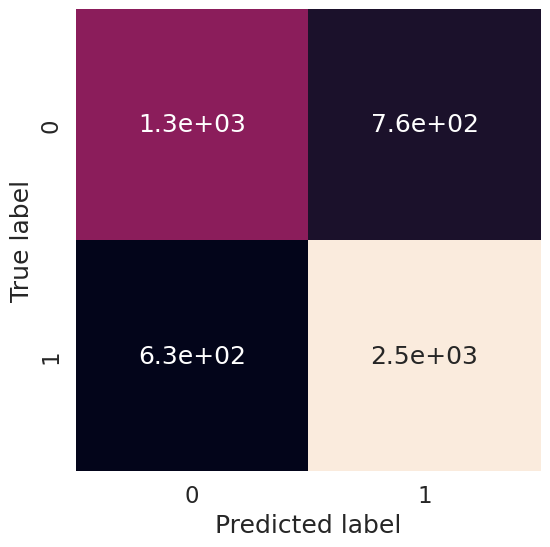

In [171]:
import matplotlib.ticker as ticker
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap().
    """
    matrix = confusion_matrix(y_test, y_preds)
    print(matrix)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        matrix,
        annot=True, # Annotate the boxes
        cbar=False
    )
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

y_preds = model.predict(X_test)
plot_conf_mat(y_test, y_preds)

In [172]:
print(
    classification_report(y_test, preds)
)

              precision    recall  f1-score   support

       False       0.67      0.63      0.65      2052
        True       0.77      0.80      0.78      3152

    accuracy                           0.73      5204
   macro avg       0.72      0.71      0.72      5204
weighted avg       0.73      0.73      0.73      5204



['remaining_days' 0.04452417714612042]
['membership_expire_date_day_of_year' 0.03769729231011813]
['transaction_date_day' 0.03287019893185488]
['is_auto_renew' 0.031900697751098335]
['transaction_date_day_of_year' 0.03169699943453897]
['num_unq' 0.028124746657387366]
['total_secs' 0.028073803878353388]
['total_hours' 0.027319333067773496]
['num_100' 0.026518292067160085]
['total_secs-1M' 0.02557778521559801]
['num_25' 0.02479254013747348]
['membership_expire_date_day' 0.024386332407813915]
['registration_init_time_day_of_year' 0.024273900510259242]
['num_100-2M' 0.024263535060186924]
['total_secs-2M' 0.02421320575273063]
['num_unq-1M' 0.02416607362415444]
['num_100-1M' 0.024151896364736893]
['num_unq-2M' 0.023619050496106395]
['num_25-1M' 0.022327075042583605]
['num_25-2M' 0.021881523467209132]
['membership_expire_date_month' 0.021835141461126143]
['safra_month' 0.020761249542896848]
['num_50' 0.02071800029248585]
['num_75' 0.020552593151151342]
['transaction_date_day_of_week' 0.020372

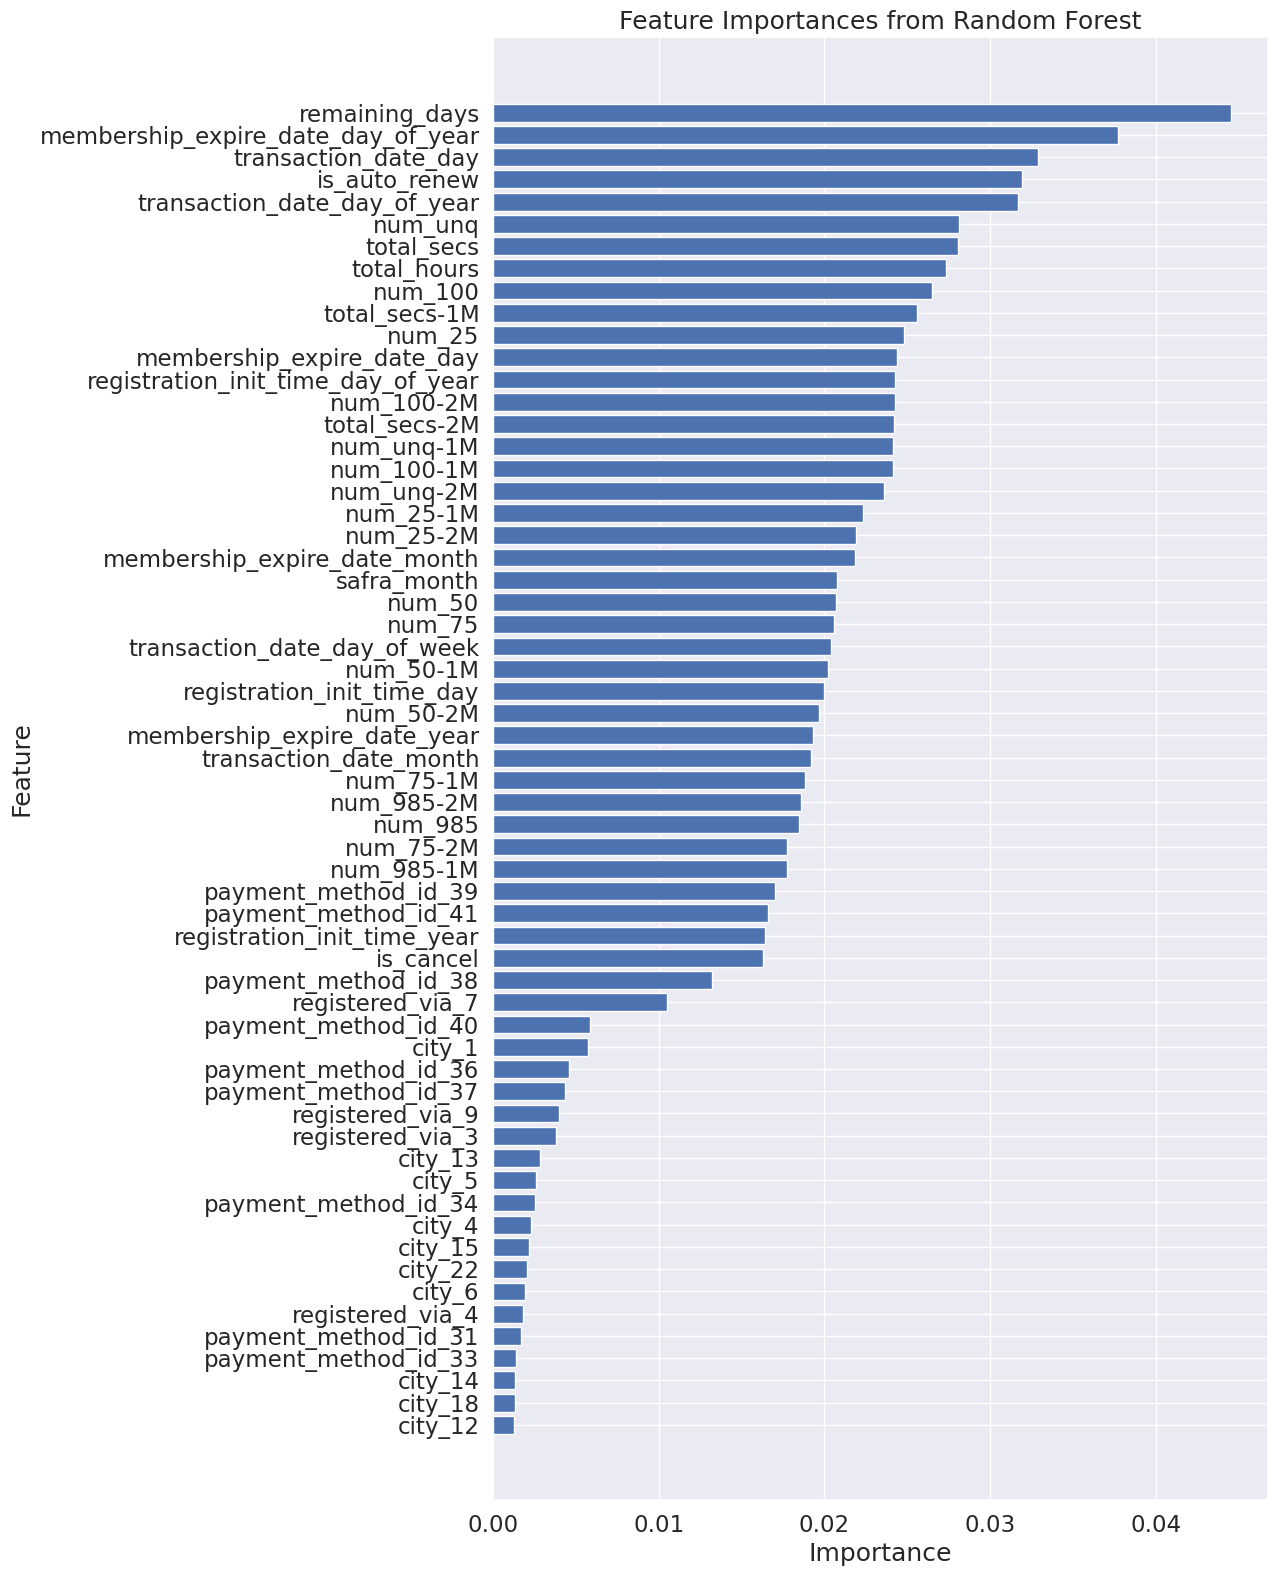

In [173]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# feature_importances = feature_importances[:50]

for f in feature_importances.values:
    print(f)

feature_importances = feature_importances[feature_importances['Importance'] >= 0.001]

# Plot the feature importances
plt.figure(figsize=(10, 19))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

In [175]:
import joblib
SAVED_MODEL_FILENAME = './models/random_forest_model_' + datetime.now().strftime('%Y-%m-%d-%Hh-%Mm') + '.joblib'
joblib.dump(model, SAVED_MODEL_FILENAME)

['./models/random_forest_model_2025-03-22-13h-40m.joblib']

In [176]:
loaded_model = joblib.load(SAVED_MODEL_FILENAME)
loaded_model

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='log2',
                       min_samples_split=10, random_state=42)